<a href="https://colab.research.google.com/github/Emadrust/STLF-using-ANN/blob/main/toc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing necessary libraries**

In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive


Mounted at /content/gdrive


# **Mount Google Drive**

In [ ]:
drive.mount('/content/gdrive')

# **1. Data Loading and Preprocessing**

In [ ]:
df=pd.read_csv('gdrive/My Drive/Project/continuous dataset.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
48044,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
48045,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1
48046,2020-06-26 23:00:00,1041.6240,26.867487,0.020464,0.064178,10.326567,25.258112,0.019403,0.108063,2.720871,23.601862,0.018358,0.152771,3.138132,0,0,1


## **Set datetime index**

In [ ]:
df.index = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


##**Plotting National Demand**

<Axes: xlabel='datetime'>

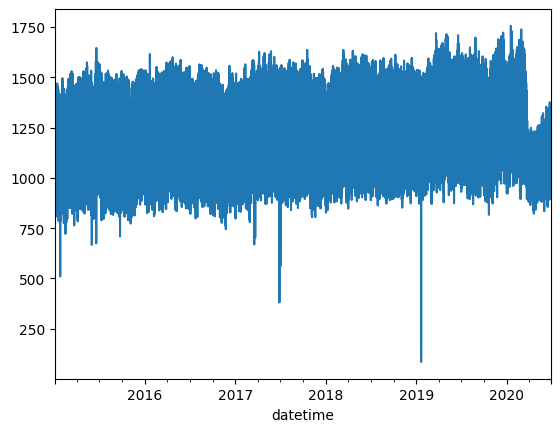

In [ ]:
load = df['nat_demand']
load.plot()

# **2. Feature Engineering**

## **Create DataFrame with National Demand and add time-based features**

In [ ]:
 load_df = pd.DataFrame({'Nat demand':load})
load_df['Seconds'] = load_df.index.map(pd.Timestamp.timestamp)
load_df


,Nat demand,Seconds
datetime,,
2015-01-03 01:00:00,970.3450,1.420247e+09
2015-01-03 02:00:00,912.1755,1.420250e+09
2015-01-03 03:00:00,900.2688,1.420254e+09
2015-01-03 04:00:00,889.9538,1.420258e+09
2015-01-03 05:00:00,893.6865,1.420261e+09
...,...,...
2020-06-26 20:00:00,1128.5592,1.593202e+09
2020-06-26 21:00:00,1112.7488,1.593205e+09
2020-06-26 22:00:00,1081.5680,1.593209e+09


In [ ]:
day = 60*60*24
year = 365.2425*day

load_df['Day sin'] = np.sin(load_df['Seconds'] * (2* np.pi / day))
load_df['Day cos'] = np.cos(load_df['Seconds'] * (2 * np.pi / day))
load_df['Year sin'] = np.sin(load_df['Seconds'] * (2 * np.pi / year))
load_df['Year cos'] = np.cos(load_df['Seconds'] * (2 * np.pi / year))
load = load_df.drop('Seconds', axis=1)
load.head()

,Nat demand,Day sin,Day cos,Year sin,Year cos
datetime,,,,,
2015-01-03 01:00:00,970.3450,0.258819,0.965926,0.036619,0.999329
2015-01-03 02:00:00,912.1755,0.500000,0.866025,0.037336,0.999303
2015-01-03 03:00:00,900.2688,0.707107,0.707107,0.038052,0.999276
2015-01-03 04:00:00,889.9538,0.866025,0.500000,0.038768,0.999248
2015-01-03 05:00:00,893.6865,0.965926,0.258819,0.039484,0.999220


## **Combine all features into a final DataFrame**

In [ ]:
load_final_df = pd.concat([load,df['QV2M_toc'],df['W2M_toc'],df['TQL_toc'],df['T2M_toc'],df['QV2M_dav'],df['W2M_dav'],df['TQL_dav'],df['T2M_dav'],df['QV2M_san'],df['W2M_san'],df['TQL_san'],df['T2M_san'],df['Holiday_ID'] ,df['holiday'], df['school']], axis=1)
load_final_df.head()

,Nat demand,Day sin,Day cos,Year sin,Year cos,QV2M_toc,W2M_toc,TQL_toc,T2M_toc,QV2M_dav,W2M_dav,TQL_dav,T2M_dav,QV2M_san,W2M_san,TQL_san,T2M_san,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,0.258819,0.965926,0.036619,0.999329,0.018576,21.850546,0.016174,25.865259,0.016562,5.364148,0.096100,22.662134,0.017272,10.328949,0.001855,23.482446,0,0,0
2015-01-03 02:00:00,912.1755,0.500000,0.866025,0.037336,0.999303,0.018653,22.166944,0.016418,25.899255,0.016509,5.572471,0.087646,22.578943,0.017265,10.681517,0.001327,23.399255,0,0,0
2015-01-03 03:00:00,900.2688,0.707107,0.707107,0.038052,0.999276,0.018768,22.454911,0.015480,25.937280,0.016479,5.871184,0.078735,22.531030,0.017211,10.874924,0.001428,23.343530,0,0,0
2015-01-03 04:00:00,889.9538,0.866025,0.500000,0.038768,0.999248,0.018890,22.110481,0.016273,25.957544,0.016487,5.883621,0.068390,22.512231,0.017128,10.518620,0.002599,23.238794,0,0,0
2015-01-03 05:00:00,893.6865,0.965926,0.258819,0.039484,0.999220,0.018981,21.186089,0.017281,25.973840,0.016456,5.611724,0.064362,22.481653,0.017059,9.733589,0.001729,23.075403,0,0,0


## **One-hot encoding of categorical variables**

In [ ]:
# One-hot encoding of the binary variables (although for binary features it’s optional)
load_final_df['holiday'] = pd.Categorical(load_final_df['holiday'])
load_final_df['school'] = pd.Categorical(load_final_df['school'])
load_final_df['school'] = pd.Categorical(load_final_df['Holiday_ID'])
# If you want to one-hot encode them manually (though unnecessary in the binary case):
load_final_df = pd.get_dummies(load_final_df, columns=['holiday', 'school', 'Holiday_ID'])

# Check the result
load_final_df.head()

,Nat demand,Day sin,Day cos,Year sin,Year cos,QV2M_toc,W2M_toc,TQL_toc,T2M_toc,QV2M_dav,...,Holiday_ID_13,Holiday_ID_14,Holiday_ID_15,Holiday_ID_16,Holiday_ID_17,Holiday_ID_18,Holiday_ID_19,Holiday_ID_20,Holiday_ID_21,Holiday_ID_22
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,0.258819,0.965926,0.036619,0.999329,0.018576,21.850546,0.016174,25.865259,0.016562,...,False,False,False,False,False,False,False,False,False,False
2015-01-03 02:00:00,912.1755,0.500000,0.866025,0.037336,0.999303,0.018653,22.166944,0.016418,25.899255,0.016509,...,False,False,False,False,False,False,False,False,False,False
2015-01-03 03:00:00,900.2688,0.707107,0.707107,0.038052,0.999276,0.018768,22.454911,0.015480,25.937280,0.016479,...,False,False,False,False,False,False,False,False,False,False
2015-01-03 04:00:00,889.9538,0.866025,0.500000,0.038768,0.999248,0.018890,22.110481,0.016273,25.957544,0.016487,...,False,False,False,False,False,False,False,False,False,False
2015-01-03 05:00:00,893.6865,0.965926,0.258819,0.039484,0.999220,0.018981,21.186089,0.017281,25.973840,0.016456,...,False,False,False,False,False,False,False,False,False,False


#**3. Data Splitting and Scaling**

In [ ]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0]]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X1, y1 = df_to_X_y(load_final_df)
X1.shape, y1.shape

((48038, 10, 65), (48038, 1))

## **Split the data into training, validation, and test sets**

In [ ]:
X1_train, y1_train = X1[:33630], y1[:33630]
X1_val, y1_val = X1[33630:38434], y1[33630:38434]
X1_test, y1_test = X1[38434:], y1[38434:]
X1_train.shape, y1_train.shape, X1_val.shape, y1_val.shape, X1_test.shape, y1_test.shape

((33630, 10, 65),
 (33630, 1),
 (4804, 10, 65),
 (4804, 1),
 (9604, 10, 65),
 (9604, 1))

# **Normalization**

## **Initialize the scalers**

In [ ]:
input_scaler = MinMaxScaler()
output_scaler = MinMaxScaler()

## **Reshape and fit the input scaler on the training data**

In [ ]:
n_train_samples, n_timesteps, n_features = X1_train.shape
X1_train_reshaped = X1_train.reshape(-1, n_features)
input_scaler.fit(X1_train_reshaped)

## **Transform the training, validation, and test input data**

In [ ]:
X1_train_scaled = input_scaler.transform(X1_train_reshaped).reshape(n_train_samples, n_timesteps, n_features)

n_val_samples = X1_val.shape[0]
X1_val_scaled = input_scaler.transform(X1_val.reshape(-1, n_features)).reshape(n_val_samples, n_timesteps, n_features)

n_test_samples = X1_test.shape[0]
X1_test_scaled = input_scaler.transform(X1_test.reshape(-1, n_features)).reshape(n_test_samples, n_timesteps, n_features)

## **Fit the output scaler on the training outputs**

In [ ]:
y1_train = y1_train.reshape(-1, 1)
output_scaler.fit(y1_train)

## **Transform the training, validation, and test output data**

In [ ]:
y1_train_scaled = output_scaler.transform(y1_train)

y1_val = y1_val.reshape(-1, 1)
y1_val_scaled = output_scaler.transform(y1_val)

y1_test = y1_test.reshape(-1, 1)
y1_test_scaled = output_scaler.transform(y1_test)


# **Model 1: LSTM-based Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 65)))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(32))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 64)              │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,969 (179.57 KB)

 Trainable params: 45,969 (179.57 KB)

 Non-trainable params: 0 (0.00 B)

## **Callbacks and Complie**

In [ ]:
cp1 = ModelCheckpoint('model1/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## **Training the model**

In [ ]:
model1.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp1, es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 0.0598 - root_mean_squared_error: 0.2225 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0795
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0041 - root_mean_squared_error: 0.0638 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0636
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - loss: 0.0026 - root_mean_squared_error: 0.0513 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0572
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - val_loss: 0.0032 - val_root_mean_squared_error: 0.0563
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0018 - root_mean_squared_error: 0.0430 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0521
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 0.0017 - root_mean_squared_error: 0.0407 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0471
Epoch 7/50
1051/1051 ━━━━━━━

## **Model Evaluation**

In [ ]:
model1.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 1s - 7ms/step - loss: 5.3693e-04 - root_mean_squared_error: 0.0232


[0.0005369283026084304, 0.023171713575720787]

## **Plot Prediction function**

In [ ]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def plot_predictions1(model, X, y, start=0, end=100):
  predictions_scaled = model.predict(X).flatten()
  predictions_original = output_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
  df = pd.DataFrame(data={'Predictions': predictions_original, 'Actuals':output_scaler.inverse_transform(y.reshape(-1, 1)).flatten()})
  plt.plot(df['Actuals'][start:end],label="Actuals")
  plt.plot(df['Predictions'][start:end],label="Predictions")
  plt.legend(loc="lower left")
  return df, mse(predictions_scaled, y)

### **Simple plot of Model 1**

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


(      Predictions      Actuals
 0     1350.250732  1385.319525
 1     1307.513428  1306.567400
 2     1244.364258  1236.931400
 3     1180.612671  1178.235700
 4     1128.804321  1128.470000
 ...           ...          ...
 9599  1132.297485  1128.559200
 9600  1109.890991  1112.748800
 9601  1075.630127  1081.568000
 9602  1035.035400  1041.624000
 9603   996.158997  1013.568300
 
 [9604 rows x 2 columns],
 0.0005369283028459181)

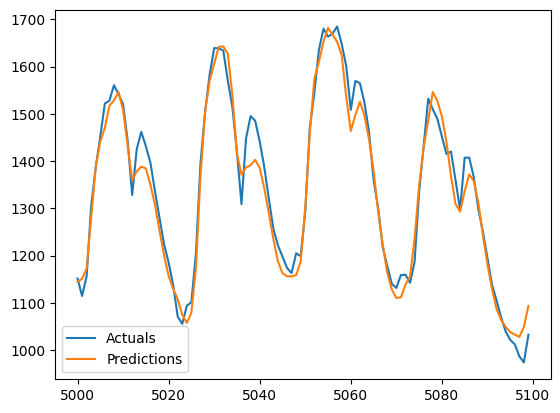

In [ ]:
plot_predictions1(model1, X1_test_scaled, y1_test_scaled,5000,5100)

# **Model 1: Conv1D-based Model**

In [ ]:
model2 = Sequential()
model2.add(InputLayer((10, 65)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 9, 64)               │           8,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │           4,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,009 (50.82 KB)

 Trainable params: 13,009 (50.82 KB)

 Non-trainable params: 0 (0.00 B)

## **Callbacks and Complie**

In [ ]:
cp2 = ModelCheckpoint('model2/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

## **Training the model**

In [ ]:
model2.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp2,es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0359 - root_mean_squared_error: 0.1699 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0815
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0040 - root_mean_squared_error: 0.0629 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0028 - root_mean_squared_error: 0.0529 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0528
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0475
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0474
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0015 - root_mean_squared_error: 0.0384 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434
Epoch 7/50
1051/1051 ━━━━━━━━━━━━━━━━━━━

## **Model Evaluation**

In [ ]:
model2.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 0s - 2ms/step - loss: 5.1003e-04 - root_mean_squared_error: 0.0226


[0.0005100335692986846, 0.022583922371268272]

### **Simple plot of Model 2**

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(      Predictions      Actuals
 0     1343.927124  1385.319525
 1     1311.623047  1306.567400
 2     1227.783569  1236.931400
 3     1167.767212  1178.235700
 4     1117.569336  1128.470000
 ...           ...          ...
 9599  1128.167969  1128.559200
 9600  1092.368164  1112.748800
 9601  1065.498901  1081.568000
 9602  1021.726318  1041.624000
 9603   987.487793  1013.568300
 
 [9604 rows x 2 columns],
 0.0005100336190205954)

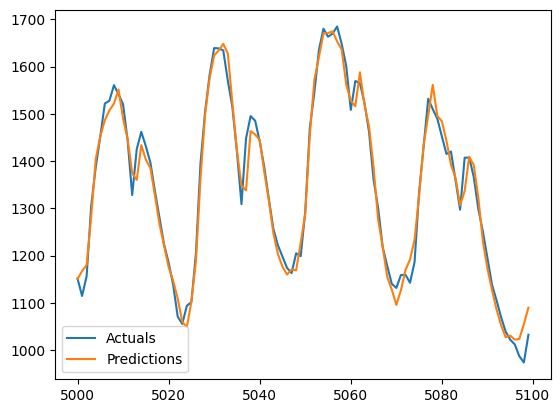

In [ ]:
plot_predictions1(model2, X1_test_scaled, y1_test_scaled,5000,5100)

# **Model 1: Conv1D-based Model**

## **Callbacks and Complie**

## **Training the model**

## **Model Evaluation**

### **Simple plot of Model 2**

In [ ]:
model3 = Sequential()
model3.add(InputLayer((10, 65)))
model3.add(GRU(64, return_sequences=True))
model3.add(GRU(32))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 64)              │          25,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,833 (136.07 KB)

 Trainable params: 34,833 (136.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp3 = ModelCheckpoint('model3/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp3, es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 0.0452 - root_mean_squared_error: 0.1919 - val_loss: 0.0056 - val_root_mean_squared_error: 0.0751
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0039 - root_mean_squared_error: 0.0620 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0522
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0018 - root_mean_squared_error: 0.0429 - val_loss: 0.0015 - val_root_mean_squared_error: 0.0390
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - loss: 9.3959e-04 - root_mean_squared_error: 0.0306 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0319
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 8.0703e-04 - root_mean_squared_error: 0.0284 - val_loss: 8.3575e-04 - val_root_mean_squared_error: 0.0289
Epoch 7/50
1051/

In [ ]:
model3.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 1s - 5ms/step - loss: 5.4359e-04 - root_mean_squared_error: 0.0233


[0.0005435941275209188, 0.023315105587244034]

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


(      Predictions      Actuals
 0     1355.484863  1385.319525
 1     1321.981445  1306.567400
 2     1243.308716  1236.931400
 3     1181.312622  1178.235700
 4     1132.589722  1128.470000
 ...           ...          ...
 9599  1148.791870  1128.559200
 9600  1121.984863  1112.748800
 9601  1090.791992  1081.568000
 9602  1052.689697  1041.624000
 9603  1013.031372  1013.568300
 
 [9604 rows x 2 columns],
 0.0005435941108237486)

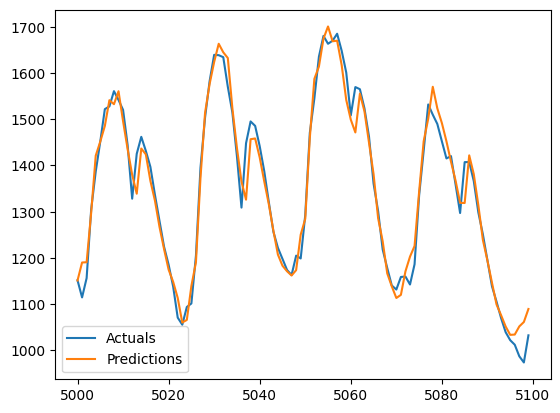

In [ ]:
plot_predictions1(model3, X1_test_scaled, y1_test_scaled,5000,5100)

# **Model 1: Conv1D-based Model**

## **Callbacks and Complie**

## **Training the model**

## **Model Evaluation**

### **Simple plot of Model 2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((10, 65)))
model4.add(LSTM(32))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,817 (50.07 KB)

 Trainable params: 12,817 (50.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp4 = ModelCheckpoint('model4/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model4.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp4, es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0267 - root_mean_squared_error: 0.1550 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0859
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0046 - root_mean_squared_error: 0.0677 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0623
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0026 - root_mean_squared_error: 0.0505 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0492
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0019 - root_mean_squared_error: 0.0441 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0456
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0014 - root_mean_squared_error: 0.0370 - val_loss: 0.0014 - val_root_mean_squared_error: 0.0379
Epoch 7/50
1051/1051 ━━━━━━━━━━━━━━━━

In [ ]:
model4.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 0s - 3ms/step - loss: 6.1079e-04 - root_mean_squared_error: 0.0247


[0.0006107920198701322, 0.024714207276701927]

# **Model 1: Conv1D-based Model**

## **Callbacks and Complie**

## **Training the model**

## **Model Evaluation**

### **Simple plot of Model 2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv1D, MaxPooling1D, Flatten, Dense

model5 = Sequential()
model5.add(InputLayer(shape=(10, 65)))  # Input shape (timesteps, features)
model5.add(Conv1D(64, kernel_size=2, activation='relu'))
model5.add(MaxPooling1D(pool_size=2))
model5.add(Flatten())
model5.add(Dense(8, activation='relu'))
model5.add(Dense(1, activation='linear'))

model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 9, 64)               │           8,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,449 (40.82 KB)

 Trainable params: 10,449 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp5 = ModelCheckpoint('model5/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model5.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp5,es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0268 - root_mean_squared_error: 0.1518 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0055 - root_mean_squared_error: 0.0738 - val_loss: 0.0067 - val_root_mean_squared_error: 0.0816
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0037 - root_mean_squared_error: 0.0609 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0626
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0029 - root_mean_squared_error: 0.0537 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0599
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0024 - root_mean_squared_error: 0.0492 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0651
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0469 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592
Epoch 7/50
1051/1051 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model5.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 0s - 2ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476


[0.0022645818535238504, 0.047587621957063675]

# **Model 1: Conv1D-based Model**

## **Callbacks and Complie**

## **Training the model**

## **Model Evaluation**

### **Simple plot of Model 2**

In [ ]:
model6 = Sequential()
model6.add(InputLayer((10, 65)))
model6.add(GRU(32))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 32)                  │           9,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,777 (38.19 KB)

 Trainable params: 9,777 (38.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp6 = ModelCheckpoint('model6/.keras', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model6.fit(X1_train_scaled, y1_train_scaled, validation_data=(X1_val_scaled, y1_val_scaled), epochs=50, callbacks=[cp6, es])

Epoch 1/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0351 - root_mean_squared_error: 0.1762 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0886
Epoch 2/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0045 - root_mean_squared_error: 0.0672 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 3/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0026 - root_mean_squared_error: 0.0514 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0485
Epoch 4/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0017 - root_mean_squared_error: 0.0411 - val_loss: 0.0018 - val_root_mean_squared_error: 0.0418
Epoch 5/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0013 - root_mean_squared_error: 0.0361 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0396
Epoch 6/50
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0011 - root_mean_squared_error: 0.0334 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0341
Epoch 7/50
1051/1051 ━━━━━━━━━━━━━━━━━

In [ ]:
model6.evaluate(X1_test_scaled, y1_test_scaled, batch_size=64, verbose=2)

151/151 - 0s - 3ms/step - loss: 7.0917e-04 - root_mean_squared_error: 0.0266


[0.0007091736188158393, 0.02663031406700611]

# **Model 1: Conv1D-based Model**

## **Callbacks and Complie**

## **Training the model**

## **Model Evaluation**

### **Simple plot of Model 2**

## **Plot Prediction 2 function**

In [ ]:
import matplotlib.pyplot as plt

def plot_predictions2(model, X, y, start=0, end=100, datetime_index=None):
    # Make predictions
    predictions_scaled = model.predict(X).flatten()

    # Inverse transform the predictions and actuals
    predictions_original = output_scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()
    actuals_original = output_scaler.inverse_transform(y.reshape(-1, 1)).flatten()

    # Create a DataFrame with predictions and actuals for the specific range
    df = pd.DataFrame(data={
        'Predictions': predictions_original[start:end],
        'Actuals': actuals_original[start:end]
    })

    # Get the corresponding datetime indices for the specific range
    if datetime_index is not None:
        # Slice the datetime index to match the number of samples in the plot range
        datetime_index_slice = datetime_index[start:end]
        df.index = datetime_index_slice

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Actuals'], label="Actuals")
    plt.plot(df.index, df['Predictions'], label="Predictions")
    plt.xlabel('Datetime')
    plt.ylabel('Load')
    plt.title('Predictions vs Actuals')
    plt.legend(loc="lower left")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

    # Return the DataFrame and MSE
    return df, mse(predictions_original[start:end], actuals_original[start:end])


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


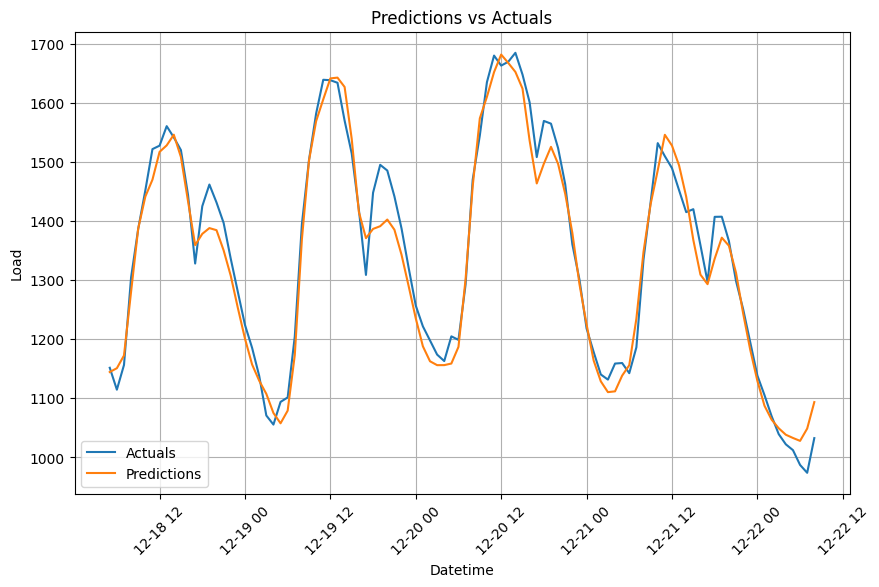

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1144.597168  1151.8148
 2019-12-18 06:00:00  1151.078857  1114.7327
 2019-12-18 07:00:00  1172.637817  1156.5203
 2019-12-18 08:00:00  1280.830811  1305.0949
 2019-12-18 09:00:00  1387.485474  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1038.481445  1022.2492
 2019-12-22 05:00:00  1033.031128  1012.4287
 2019-12-22 06:00:00  1028.092163   987.3988
 2019-12-22 07:00:00  1048.920166   974.0660
 2019-12-22 08:00:00  1093.734619  1032.7715
 
 [100 rows x 2 columns],
 1261.7834567071666)

In [ ]:
# Extract the datetime index corresponding to your test data
datetime_test_index = df.index[-len(X1_test_scaled):]  # Get the datetime index for test data

# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model1, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)


301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


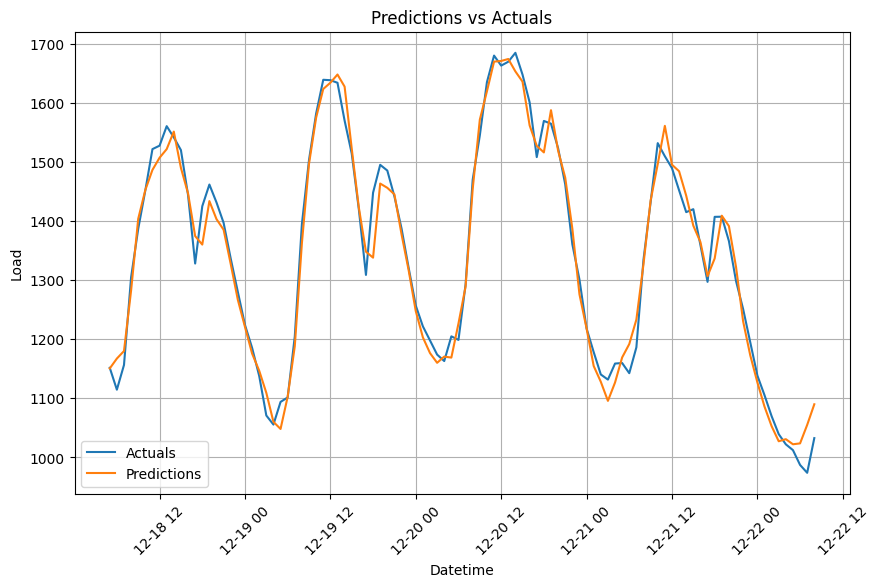

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1150.680298  1151.8148
 2019-12-18 06:00:00  1167.431030  1114.7327
 2019-12-18 07:00:00  1180.157227  1156.5203
 2019-12-18 08:00:00  1282.709717  1305.0949
 2019-12-18 09:00:00  1403.948364  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1030.985718  1022.2492
 2019-12-22 05:00:00  1022.341125  1012.4287
 2019-12-22 06:00:00  1023.862915   987.3988
 2019-12-22 07:00:00  1055.168457   974.0660
 2019-12-22 08:00:00  1090.050293  1032.7715
 
 [100 rows x 2 columns],
 876.1548820602557)

In [ ]:
# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model2, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)

301/301 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


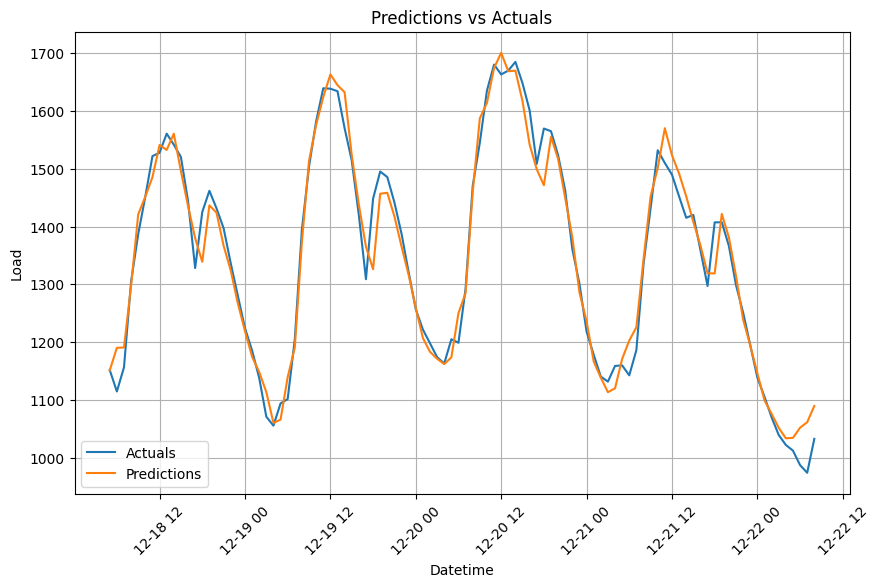

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1151.316895  1151.8148
 2019-12-18 06:00:00  1190.223877  1114.7327
 2019-12-18 07:00:00  1190.823364  1156.5203
 2019-12-18 08:00:00  1298.090820  1305.0949
 2019-12-18 09:00:00  1421.243530  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1033.774292  1022.2492
 2019-12-22 05:00:00  1034.449707  1012.4287
 2019-12-22 06:00:00  1052.068359   987.3988
 2019-12-22 07:00:00  1061.588379   974.0660
 2019-12-22 08:00:00  1089.709351  1032.7715
 
 [100 rows x 2 columns],
 1204.6327440321668)

In [ ]:
# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model3, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


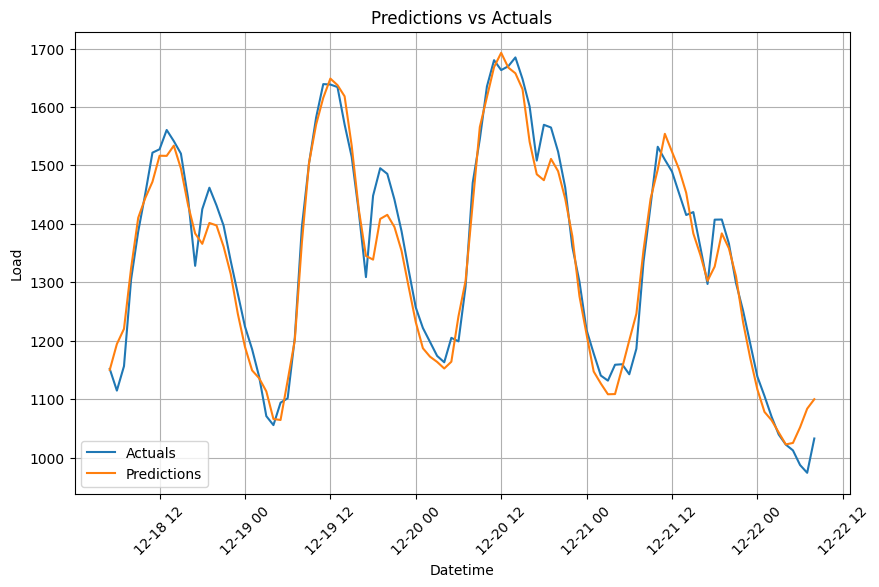

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1150.125000  1151.8148
 2019-12-18 06:00:00  1194.359863  1114.7327
 2019-12-18 07:00:00  1220.423340  1156.5203
 2019-12-18 08:00:00  1324.305664  1305.0949
 2019-12-18 09:00:00  1410.478516  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1022.618774  1022.2492
 2019-12-22 05:00:00  1025.187256  1012.4287
 2019-12-22 06:00:00  1051.883179   987.3988
 2019-12-22 07:00:00  1083.802856   974.0660
 2019-12-22 08:00:00  1099.979370  1032.7715
 
 [100 rows x 2 columns],
 1518.723155652806)

In [ ]:
# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model4, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


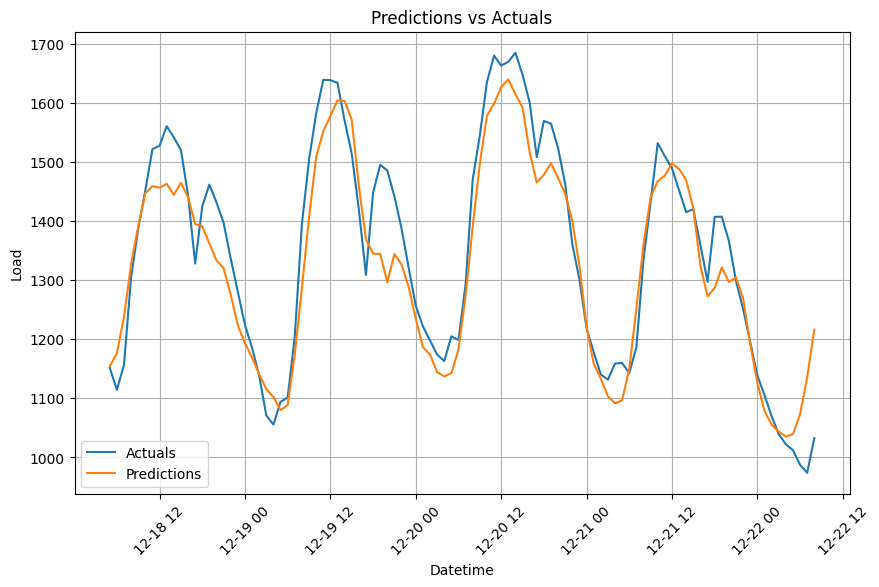

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1154.221680  1151.8148
 2019-12-18 06:00:00  1176.119385  1114.7327
 2019-12-18 07:00:00  1237.689331  1156.5203
 2019-12-18 08:00:00  1327.456055  1305.0949
 2019-12-18 09:00:00  1391.439453  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1035.258789  1022.2492
 2019-12-22 05:00:00  1039.726196  1012.4287
 2019-12-22 06:00:00  1073.076050   987.3988
 2019-12-22 07:00:00  1135.785522   974.0660
 2019-12-22 08:00:00  1216.374268  1032.7715
 
 [100 rows x 2 columns],
 4043.575185291465)

In [ ]:
# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model5, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)

301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


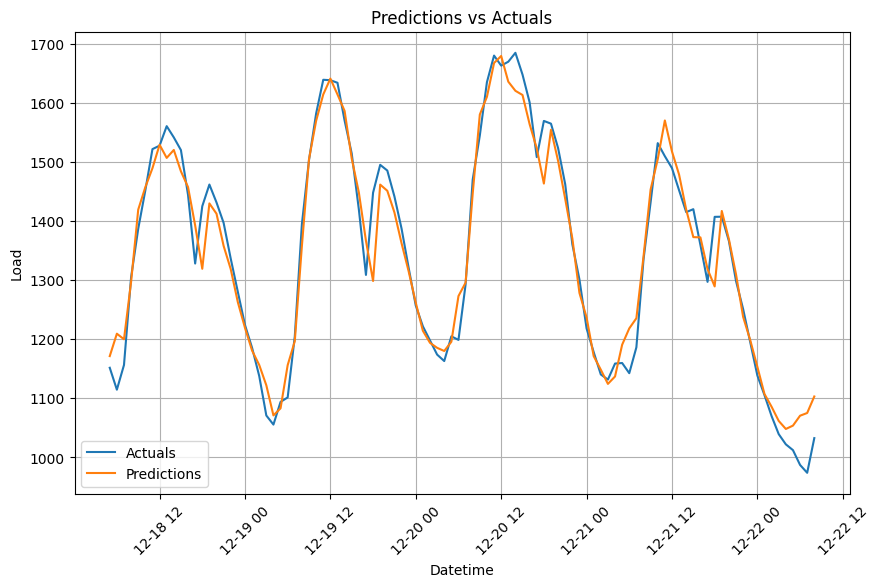

(                     Predictions    Actuals
 datetime                                   
 2019-12-18 05:00:00  1171.557617  1151.8148
 2019-12-18 06:00:00  1209.463135  1114.7327
 2019-12-18 07:00:00  1200.060913  1156.5203
 2019-12-18 08:00:00  1297.357422  1305.0949
 2019-12-18 09:00:00  1419.420898  1387.0419
 ...                          ...        ...
 2019-12-22 04:00:00  1048.268677  1022.2492
 2019-12-22 05:00:00  1053.913208  1012.4287
 2019-12-22 06:00:00  1070.700806   987.3988
 2019-12-22 07:00:00  1075.282837   974.0660
 2019-12-22 08:00:00  1103.246338  1032.7715
 
 [100 rows x 2 columns],
 1658.3114653566047)

In [ ]:
# Ensure the datetime index is sliced to match the start and end of the plot
plot_predictions2(model6, X1_test_scaled, y1_test_scaled,5000,5100, datetime_index=datetime_test_index)